(923, 960, 3)
120 sample png files were detected
['/Users/dagutman/devel/multirater-viewer/images/base_img/UDA2_pilot_001-p1c.png', '/Users/dagutman/devel/multirater-viewer/images/base_img/UDA2_pilot_001-tile-p1c.png', '/Users/dagutman/devel/multirater-viewer/images/base_img/UDA2_pilot_002-p1c.png', '/Users/dagutman/devel/multirater-viewer/images/base_img/UDA2_pilot_002-tile-p1c.png', '/Users/dagutman/devel/multirater-viewer/images/base_img/UDA2_pilot_003-p1c.png', '/Users/dagutman/devel/multirater-viewer/images/base_img/UDA2_pilot_003-tile-p1c.png', '/Users/dagutman/devel/multirater-viewer/images/base_img/UDA2_pilot_004-p1c.png', '/Users/dagutman/devel/multirater-viewer/images/base_img/UDA2_pilot_004-tile-p1c.png', '/Users/dagutman/devel/multirater-viewer/images/base_img/UDA2_pilot_005-p1c.png', '/Users/dagutman/devel/multirater-viewer/images/base_img/UDA2_pilot_005-tile-p1c.png', '/Users/dagutman/devel/multirater-viewer/images/base_img/UDA2_pilot_006-p1c.png', '/Users/dagutman/devel/

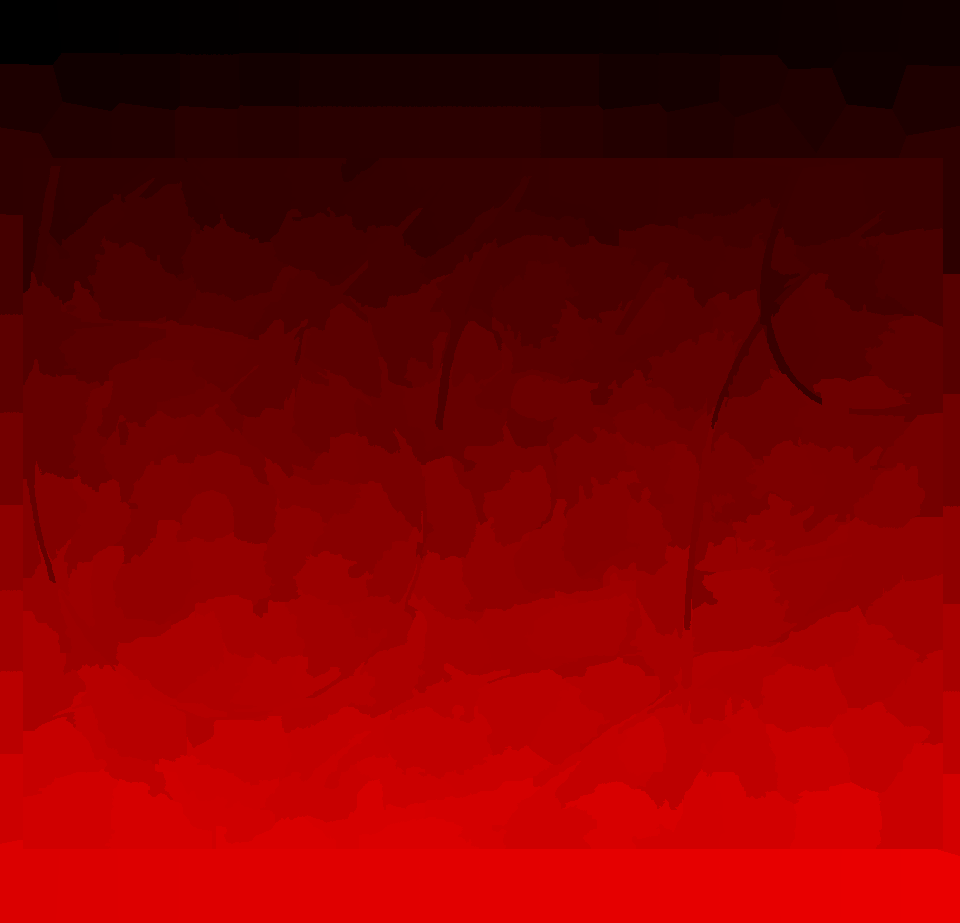

In [26]:
from IPython.display import Image
sample_png_tile =  '/Users/dagutman/devel/multirater-viewer/images/base_img/UDA2_pilot_060-tile-p1c.png'
base_img_dir = '/Users/dagutman/devel/multirater-viewer/images/base_img/'
from PIL import Image as PIL_Image
import image_processing as ip
Image(sample_png_tile)
import cv2,os
import glob
img = cv2.imread(sample_png_tile)
print img.shape

png_image_list = glob.glob(base_img_dir+'*.png')  ## This contains tile and background images
print len(png_image_list),"sample png files were detected"
print png_image_list
Image(sample_png_tile)

In [32]:
import json

annotated_image_list = []  ## I am going to push a list of dictionaries.. each item is a specific image which then contains all the metadata for that image

for img in png_image_list:
    if 'tile' not in img:

        img_filename = os.path.basename(img).replace('-p1c.png','')
        filename_url = 'images/base_img/'+os.path.basename(img)
        tile_img_url = 'images/base_img/' + img_filename + '-tile-p1c.png'
        
        
        ### GENERATE THE CONTOUR FILE FOR THIS AS WELL
        svg_output_file = 'data/'+img_filename+'-superpixels.svg'
        ### Add in a check to see if it exists

        print "Processing",img_filename
        
        if not os.path.isfile(svg_output_file):

            
            try:
                superpixel_contours = TileMap_to_SVG(filename_url.replace('-p1c.png','-tile-p1c.png'))
                with  open(svg_output_file,'w') as outfile:
                    json.dump(superpixel_contours, outfile)
            except:
                print "Unable to generate superpixel image for",img_filename
        
        ### I also need the width and height of an image to properly setup the canvas
        im=PIL_Image.open(img)
        (img_width,img_height) = im.size;
        cur_image_info_dd = { 'filename_url': filename_url, 'tile_img_url': tile_img_url, 'image_name': img_filename,
                            'img_width': img_width, 'img_height': img_height, 'superpixel_svg': svg_output_file}
        annotated_image_list.append(cur_image_info_dd)
        
#print annotated_image_list
import json  
with  open('data/image_info.json','w') as outfile:
    json.dump(annotated_image_list, outfile)


Processing UDA2_pilot_001
Processing UDA2_pilot_002
Processing UDA2_pilot_003
0 were found for label 0
Unable to generate superpixel image for UDA2_pilot_003
Processing UDA2_pilot_004
0 were found for label 0
Processing UDA2_pilot_005
0 were found for label 0
Processing UDA2_pilot_006
0 were found for label 0
Processing UDA2_pilot_007
0 were found for label 0
Unable to generate superpixel image for UDA2_pilot_007
Processing UDA2_pilot_008
0 were found for label 0
Processing UDA2_pilot_009
0 were found for label 0
Processing UDA2_pilot_010
0 were found for label 0
Processing UDA2_pilot_011
0 were found for label 0
Processing UDA2_pilot_012
0 were found for label 0
Processing UDA2_pilot_013
0 were found for label 0
Unable to generate superpixel image for UDA2_pilot_013
Processing UDA2_pilot_014
0 were found for label 0
Processing UDA2_pilot_015
0 were found for label 0
Processing UDA2_pilot_016
0 were found for label 0
Processing UDA2_pilot_017
0 were found for label 0
Unable to generate

In [34]:
filename_url = 'images/base_img/UDA2_pilot_003-p1c.png'
superpixel_contours = TileMap_to_SVG(filename_url.replace('-p1c.png','-tile-p1c.png'))

0 were found for label 0


IndexError: invalid index to scalar variable.

2658240


<IPython.core.display.Image object>

In [15]:
my_contours = TileMap_to_SVG(sample_png_tile)
#print len(cntdict),"keys in the contour dict???"
#print cntdict.keys()
print len(my_contours)
#print my_contours.keys()
import json  
with  open('data/data.geojson','w') as outfile:
    json.dump(my_contours, outfile)

0 were found for label 0
242


In [5]:
# contours, hierarchy = cv2.findContours(working_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
# print len(contours[0]),hierarchy
# cntr =  contours[0]
# print contours
# for c in cntr:
#     print c,

In [30]:
import numpy as np, cv2, geojson


### I have to switch coordinate systems, which is why I need to multiple by -1

def contourToSVGString(contour):
        """
        convert an OpenCV contour to a geojson-compatible representation
        """
        t_string = []
        for pt in contour:
            #print pt
            px = np.round(pt[0] )
#            py =  -1* numpy.round(pt[1] ) +923 ## Appears Y is inverted/negative in the cntours
            py =  np.round(pt[1] )  ## Appears Y is inverted/negative in the cntours

            t_string.append((float(px), float(py)))

        return t_string

def TileMap_to_SVG( tileImg ):
    """
    This function takes an input image as a PNG File and produces a pointlist of the
    outer most contour for each label map, and produces a format I can read in as SVG for visualization"""
    debug = False
    
    # Load an color image in grayscale; currently not working with > 256 superpixels
    img = cv2.imread(tileImg)
    img_gray = img[:,:,2]

    unique_labels = np.unique(img_gray)
    if debug: print len(unique_labels)
            
    #unique_labels = unique_labels[40:100]
    all_cnts = []
    cntdict = {}
    return_data = []
    ## So a given label/contour can contain one or more features...
    

    ## Now iterate through each label, mask the input image with the label, and find appropriate contours
    for label in unique_labels:
        working_img = img_gray.copy()
        working_img[working_img != label] = 0
        
        ## can pass cv2.RETR_CCCOMP or RETR_EXTERNAL
        contours, hierarchy = cv2.findContours(working_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) ## can also do CHAIN_APPROX_TC89_L1
        
        if len(contours) > 0:
            if debug: print "Found %d contours for label %s" % ( len(contours), label)

            for c in contours:    
            #print "Parsing label",label
                outerpoly = contourToSVGString( np.squeeze( c ) )
       
            
                all_cnts.append( { 'geometry': { 'type': 'polygon', 'coordinates': outerpoly }, 'properties' : { 'labelindex': str(label)    } } )
        else:
            print len(contours),"were found for label",label
      
    for c in all_cnts:
        #print c
        return_data.append(geojson.dumps(c))
        
    return return_data


In [1]:
#print working_img
#Image(masked_img)
from matplotlib.pyplot import imshow
#Image
working_img = imgray.copy()
working_img[working_img != 120] = 0
#masked_img = Image.fromarray(working_img, 'RGB')
from PIL import Image as PILImage
#PILImage.fromarray(working_img)

NameError: name 'imgray' is not defined

In [150]:
print "image x",img_x
print "image y",img_y

tr = (img_x,0)
#imgray.shape  ## NO IDEA what 
bl = (0,img_y)

print tr,bl
native_width = tr[0] - bl[0]
native_height = -bl[1] + tr[1]

#native_width = 

# extent = opdata['extent']
# tr = extent[0]
# bl = extent[1]
# native_width = tr[0] - bl[0]
# native_height = -bl[1] + tr[1]

native_width = imgray.shape[0]
native_height = imgray.shape[1]
#img

image x 960
image y 923
(960, 0) (0, 923)


In [23]:
print imgray.shape
# ip._segmentConnectedRegionCV
import json  
with  open('data/data.geojson','w') as outfile:
    json.dump(return_data, outfile)

# ...skipping...
# def segmentationSourceHandler(item, params):
#     # todo : have it pull the appropriate annotation, it current pulls the last one

#     files = ModelImporter.model('item').childFiles(item, sort=[('created', pymongo.DESCENDING)])

#     for first_file in files:
#         if first_file['mimeType'] == 'image/png':
#             # this is a hack; we should use negative lookahead assertions instead
#             if re.search(r'-p1.\.png$', first_file['name']) and not re.search(r'-tile-p1.\.png$', first_file['name']):
#                 break
#     else:
#         raise RestException('No source PNG file in item')

#     file_download = ModelImporter.model('file').download(first_file, headers=True)
#     cherrypy.response.headers['Content-Disposition'] = 'inline; filename="%s"' % first_file['name']
#     return file_download

# segmentationSourceHandler.cookieAuth = True
# segmentationSourceHandler.description = (
#     Description('Retrieve segmentation source PNG image for a given image item.')
#     .param('item_id', 'The item ID', paramType='path')
#     .errorResponse())

(923, 960)


In [13]:
def segmentLabelMapImage( image):
    """
    This function takes an input image as a PNG File and produces a pointlist of the
    outer most contour for each label map, and produces a composite GeoJSON Object"""

    
    
def segmentImage(input_parameters):
    """
    This function takes an input URL, seed point, and tolerance and produces a
    pointlist of the outer-most contour
    """
    opdata = input_parameters

    imgstr = re.search(r'base64,(.*)', opdata['image']).group(1)
    tempimg = cStringIO.StringIO(imgstr.decode('base64'))
    tempimg.seek(0)
    cvimg = cv2.imdecode(numpy.asarray(bytearray(tempimg.read()), dtype=numpy.uint8), 1)
    # cv2.imwrite('inputimage.png', cvimg)

    # imgray = cv2.cvtColor(cvimg,cv2.COLOR_BGR2GRAY)
    imgray = cvimg[:, :, 2]
    # cv2.imwrite('segment.png', imgray)

    all_cnts = []
    cntdict = {}

    return_data = []

    extent = opdata['extent']
    tr = extent[0]
    bl = extent[1]

    native_width = tr[0] - bl[0]
    native_height = -bl[1] + tr[1]

    x_scale = native_width / imgray.shape[1]
    y_scale = native_height / imgray.shape[0]

    def contourToGeoString(contour):
        """
        convert an OpenCV contour to a geojson-compatible representation
        """
        t_string = []
        for pt in contour:

            px = numpy.round(pt[0] * x_scale) + bl[0]
            py = -1 * numpy.round(pt[1] * y_scale) + tr[1]

            t_string.append((float(px), float(py)))

        return t_string

    unique_labels = numpy.unique(imgray)

    # we're going to make an assumption: only consider a single hole in a polygon

    for label in unique_labels:

        working_img = imgray.copy()
        working_img[working_img != label] = 0

        # CV_RETR_CCOMP retrieves all of the contours and organizes them into a two-level
        # hierarchy. At the top level, there are external boundaries of the components.
        # At the second level, there are boundaries of the holes. If there is another contour
        # inside a hole of a connected component, it is still put at the top level.

        contours, hierarchy = cv2.findContours(working_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

        # hierarchy[i][0] , hiearchy[i][1] , hiearchy[i][2] , and hiearchy[i][3] are set
        # to 0-based indices in contours of the next and previous contours at the same
        # hierarchical level, the first child contour and the parent contour, respectively.
        # If for the contour i there are no next, previous, parent, or nested contours,
        # the corresponding elements of hierarchy[i] will be negative.

        for n, cnt in enumerate(contours):

            hei = hierarchy[0][n]

            # create an array for this polygon
            if str(label) not in cntdict.keys():
                cntdict[str(label)] = []

            if hei[3] >= 0:
                # print '%s: %d -> this contour has a parent: %d' % (label, n, hei[3])
                # this contour has a parent, do not add it directly
                pass

            elif hei[2] < 0:
                # this contour has no children, just add it

                outer_poly = (contourToGeoString(numpy.squeeze(cnt)))

    #             x_vals = numpy.round(ca[:,0] * x_scale) + bl[0]
    #             y_vals = -1*numpy.round(ca[:,1] * y_scale) + tr[1]

                # print '(add) %s: %d -> this contour (%d) has no children' % (label,n, len(outer_poly))

                feat = geojson.Feature(
                    geometry=geojson.Polygon((outer_poly,)),
                    id=len(all_cnts),
                    properties={
                        'labelindex': str(label)
                    }
                )


                cntdict[str(label)].append(feat)
                all_cnts.append(feat)

            else:
                # contour's child is at contours[hei[2]]
                # add this contour and it's child

                outer_poly = contourToGeoString(numpy.squeeze(cnt))
                inner_poly = contourToGeoString(numpy.squeeze(contours[hei[2]]))

                # print '(add) %s: %d -> this contour (%d) has a child: %d (%d)' % (label, n, len(outer_poly), hei[2], len(inner_poly))

                feat = geojson.Feature(
                    geometry=geojson.Polygon((outer_poly, inner_poly)),
                    id=len(all_cnts),
                    properties={
                        'labelindex': str(label)
                    }
                )

                cntdict[str(label)].append(feat)

                all_cnts.append(feat)

        for c in all_cnts:
            return_data.append(geojson.dumps(c))

    return return_data